In [1]:
from sklearn import tree 
import pandas as pd
import os
import sklearn
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics 
import seaborn as sns

In [2]:
pap = pd.read_csv('framingham.csv')

In [3]:
pap

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [26]:
pap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   male           4238 non-null   int64  
 1   age            4238 non-null   int64  
 2   education      4133 non-null   float64
 3   currentSmoker  4238 non-null   int64  
 4   cigsPerDay     4209 non-null   float64
 5   prevalentHyp   4238 non-null   int64  
 6   totChol        4188 non-null   float64
 7   sysBP          4238 non-null   float64
 8   diaBP          4238 non-null   float64
 9   BMI            4219 non-null   float64
 10  heartRate      4237 non-null   float64
 11  glucose        3850 non-null   float64
 12  TenYearCHD     4238 non-null   int64  
dtypes: float64(8), int64(5)
memory usage: 430.6 KB


In [21]:
pap = pap.drop(['BPMeds', 'prevalentStroke','diabetes'], axis=1)

In [12]:
value = pap.loc[1, 'diabetes']

In [14]:
value

0

In [24]:
pap

,male,age,education,currentSmoker,cigsPerDay,prevalentHyp,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,1,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,1,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [28]:
X = pap[['male', 'age', 'education', 'cigsPerDay','prevalentHyp','totChol','sysBP','diaBP','BMI','heartRate','glucose']]
y = pap['TenYearCHD']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)


In [54]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=2)

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [46]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

[Text(0.4125479398588108, 0.98, 'x[1] <= 46.5\nentropy = 0.615\nsamples = 4238\nvalue = [3594, 644]'),
 Text(0.12580606842248168, 0.94, 'x[3] <= 9.5\nentropy = 0.362\nsamples = 1769\nvalue = [1647, 122]'),
 Text(0.07283464566929133, 0.9, 'x[7] <= 117.75\nentropy = 0.249\nsamples = 938\nvalue = [899, 39]'),
 Text(0.06740428998099375, 0.86, 'x[10] <= 233.5\nentropy = 0.236\nsamples = 932\nvalue = [896, 36]'),
 Text(0.06523214770567472, 0.82, 'x[5] <= 415.5\nentropy = 0.231\nsamples = 931\nvalue = [896, 35]'),
 Text(0.06306000543035568, 0.78, 'x[8] <= 30.185\nentropy = 0.226\nsamples = 930\nvalue = [896, 34]'),
 Text(0.047922888949226174, 0.74, 'x[9] <= 77.5\nentropy = 0.198\nsamples = 813\nvalue = [788, 25]'),
 Text(0.03611186532717893, 0.7, 'x[9] <= 75.5\nentropy = 0.25\nsamples = 504\nvalue = [483, 21]'),
 Text(0.027694814010317675, 0.66, 'x[2] <= 3.5\nentropy = 0.219\nsamples = 486\nvalue = [469, 17]'),
 Text(0.025522671734998642, 0.62, 'x[10] <= 120.0\nentropy = 0.254\nsamples = 399\

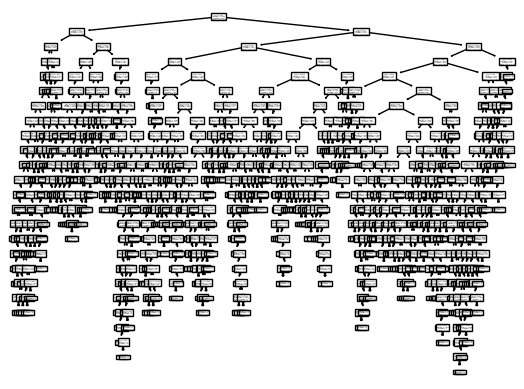

In [48]:
tree.plot_tree(clf.fit(X,y))

In [56]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.8522012578616353


In [50]:
clf.score(X,y)


0.9983482774893818

In [42]:
clf.predict([[1,4,3,477,500,1,2,3,4,1,1]])


/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])